In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pgmpy.estimators import PC
from abbeyFunctions import graph_DAG
from abiFunctions import analyze_wls_pooled_models
import pingouin

Import dataframes for plotting the full DAGs

In [3]:
diff_nominal = pd.read_csv('diff_nominal.csv')

diff_nominal.drop(columns=['Unnamed: 0'], inplace=True)

rates_nominal = pd.read_csv('rates_nominal.csv')

rates_nominal.drop(columns=['Unnamed: 0'], inplace=True)

Creating a dictionary to store the various combinations fo the dataframes for the DAGs

In [4]:
nominal_differenced_rates_with_all_variables = diff_nominal.dropna().set_index(['FIPS', 'TimePeriod'])

nominal_rates_with_all_variables = rates_nominal.dropna().set_index(['FIPS', 'TimePeriod'])

# Create a dictionary to store the DataFrames
full_DAG_dict = {}

full_DAG_dict['Nominal rates (All variables)'] = nominal_rates_with_all_variables

full_DAG_dict['Nominal rates (without Monetary)'] = nominal_rates_with_all_variables.drop(columns=['M4', 'M4I'])

full_DAG_dict['Nominal rates (without unem)'] = nominal_rates_with_all_variables.drop(columns=['unem'])

full_DAG_dict['Nominal diff rates (All variables)'] = nominal_differenced_rates_with_all_variables

full_DAG_dict['Nominal diff rates (without Monetary)'] = nominal_differenced_rates_with_all_variables.drop(columns=['M4', 'M4I'])

full_DAG_dict['Nominal diff rates (without unem)'] = nominal_differenced_rates_with_all_variables.drop(columns=['unem'])

Here we plot the DAGs

  0%|          | 0/4 [00:00<?, ?it/s]

keep control: M4I
('Util', 'M4') ['M4I']
keep control: Mini
keep control: M4
('Util', 'unem') ['Mini', 'M4']
keep control: Util
keep control: Mini
('M4', 'unem') ['Util', 'Mini']
('unem', 'M4I') []
keep control: Util
keep control: M4
('Mini', 'unem') ['Util', 'M4']
keep control: Util
('M4I', 'M4') ['Util']
('M4I', 'Mini') []


  0%|          | 0/2 [00:00<?, ?it/s]

keep control: Util
('Mini', 'unem') ['Util']
keep control: Mini
('Util', 'unem') ['Mini']


  0%|          | 0/3 [00:00<?, ?it/s]

keep control: Util
('Mini', 'M4I') ['Util']
('M4I', 'M4') []
('M4', 'Util') []
keep control: Mini
('Util', 'M4I') ['Mini']


  0%|          | 0/4 [00:00<?, ?it/s]

keep control: Agri
('Util', 'M4') ['Agri']
('M4', 'unem') []
('unem', 'Mini') []
keep control: Mini
('unem', 'M4I') ['Mini']
keep control: unem
('Mini', 'M4I') ['unem']
keep control: Util
('Agri', 'M4') ['Util']


  0%|          | 0/2 [00:00<?, ?it/s]

keep control: Util
keep control: Agri
('Mini', 'unem') ['Util', 'Agri']
keep control: Agri
keep control: Mini
('Util', 'unem') ['Agri', 'Mini']
keep control: Util
keep control: Mini
('Agri', 'unem') ['Util', 'Mini']


  0%|          | 0/3 [00:00<?, ?it/s]

keep control: Agri
keep control: Mini
keep control: M4I
('Util', 'M4') ['Agri', 'Mini', 'M4I']
keep control: Util
keep control: Agri
keep control: M4I
('Mini', 'M4') ['Util', 'Agri', 'M4I']
('Mini', 'M4I') []
keep control: Util
keep control: Agri
keep control: Mini
('M4I', 'M4') ['Util', 'Agri', 'Mini']
('M4I', 'Mini') []
keep control: Util
keep control: Mini
keep control: M4I
('Agri', 'M4') ['Util', 'Mini', 'M4I']


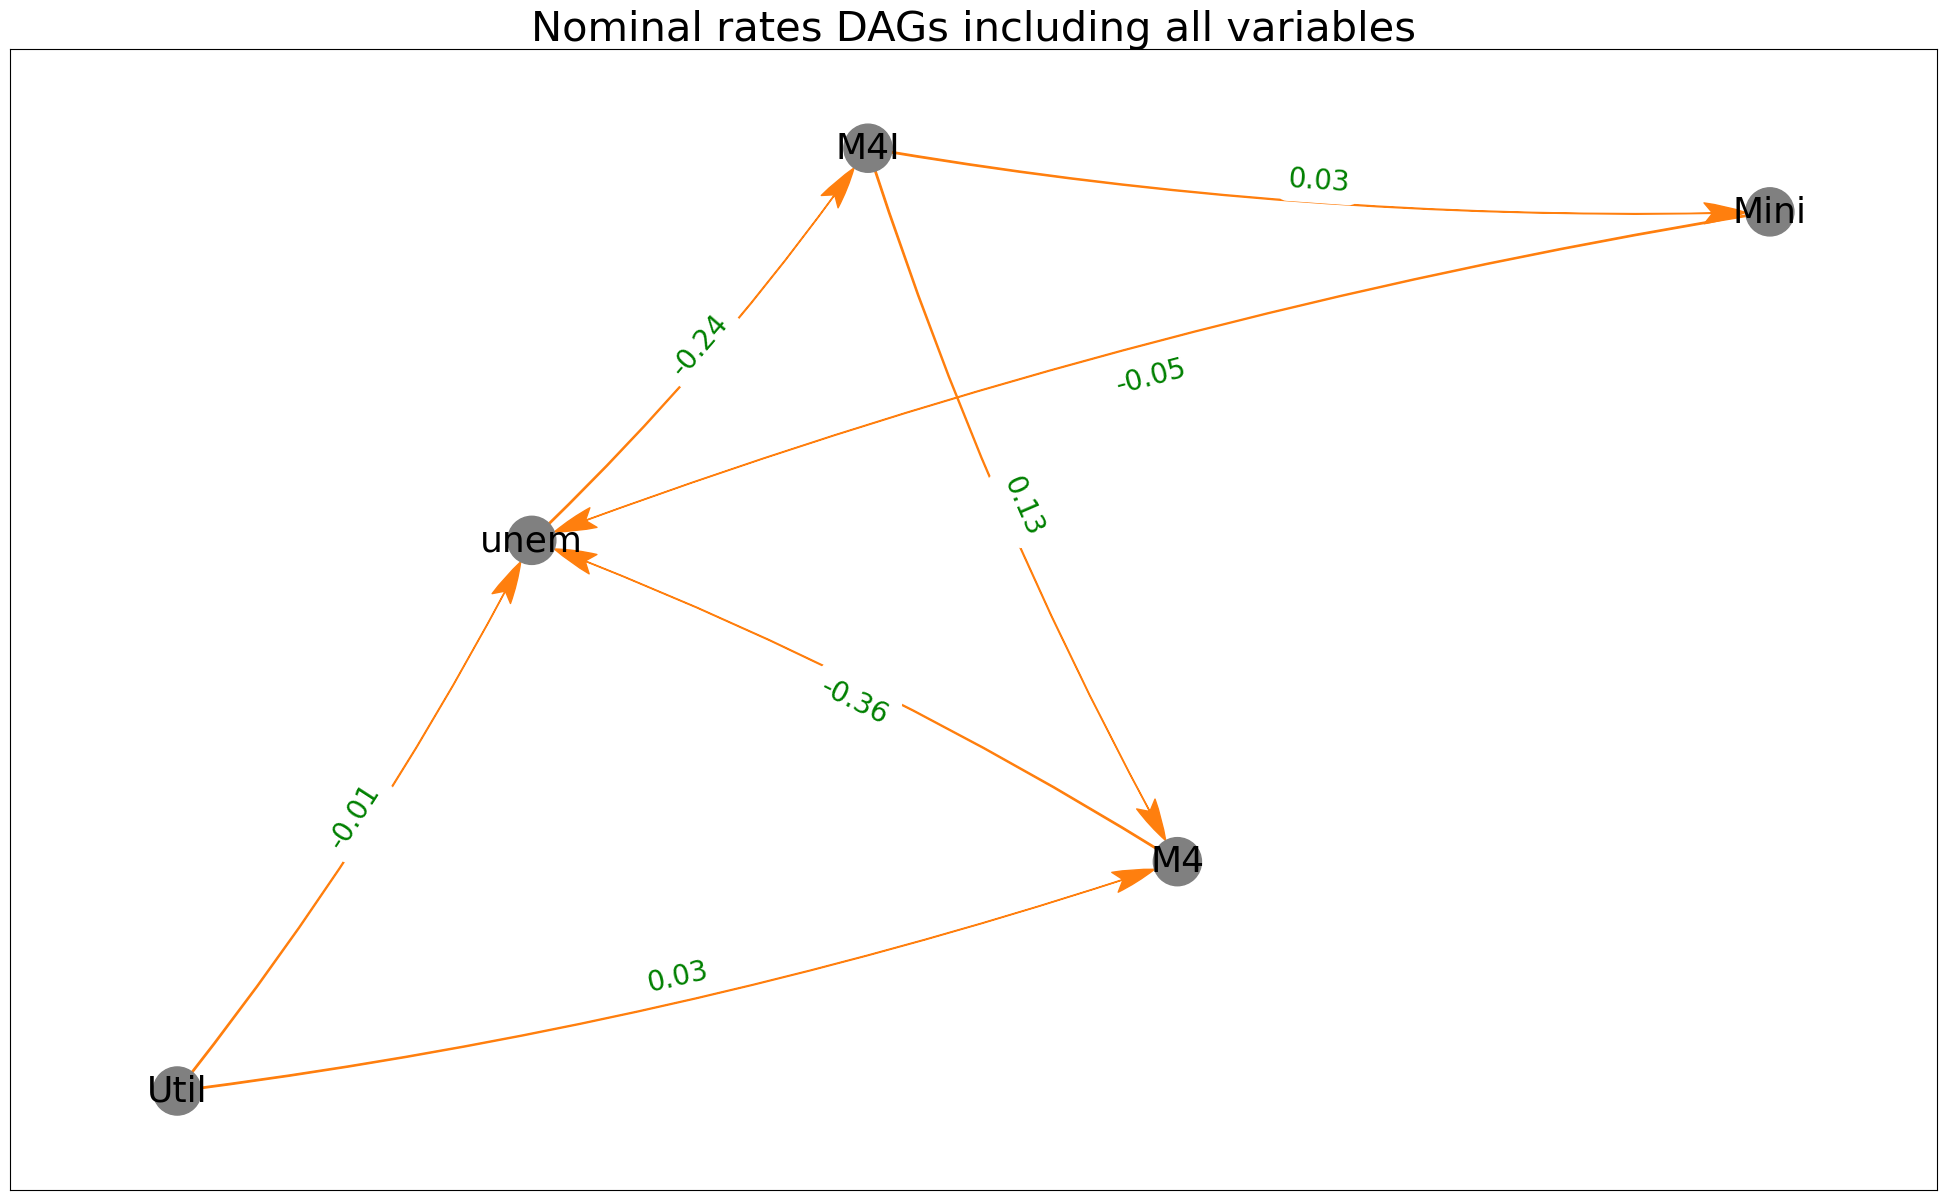

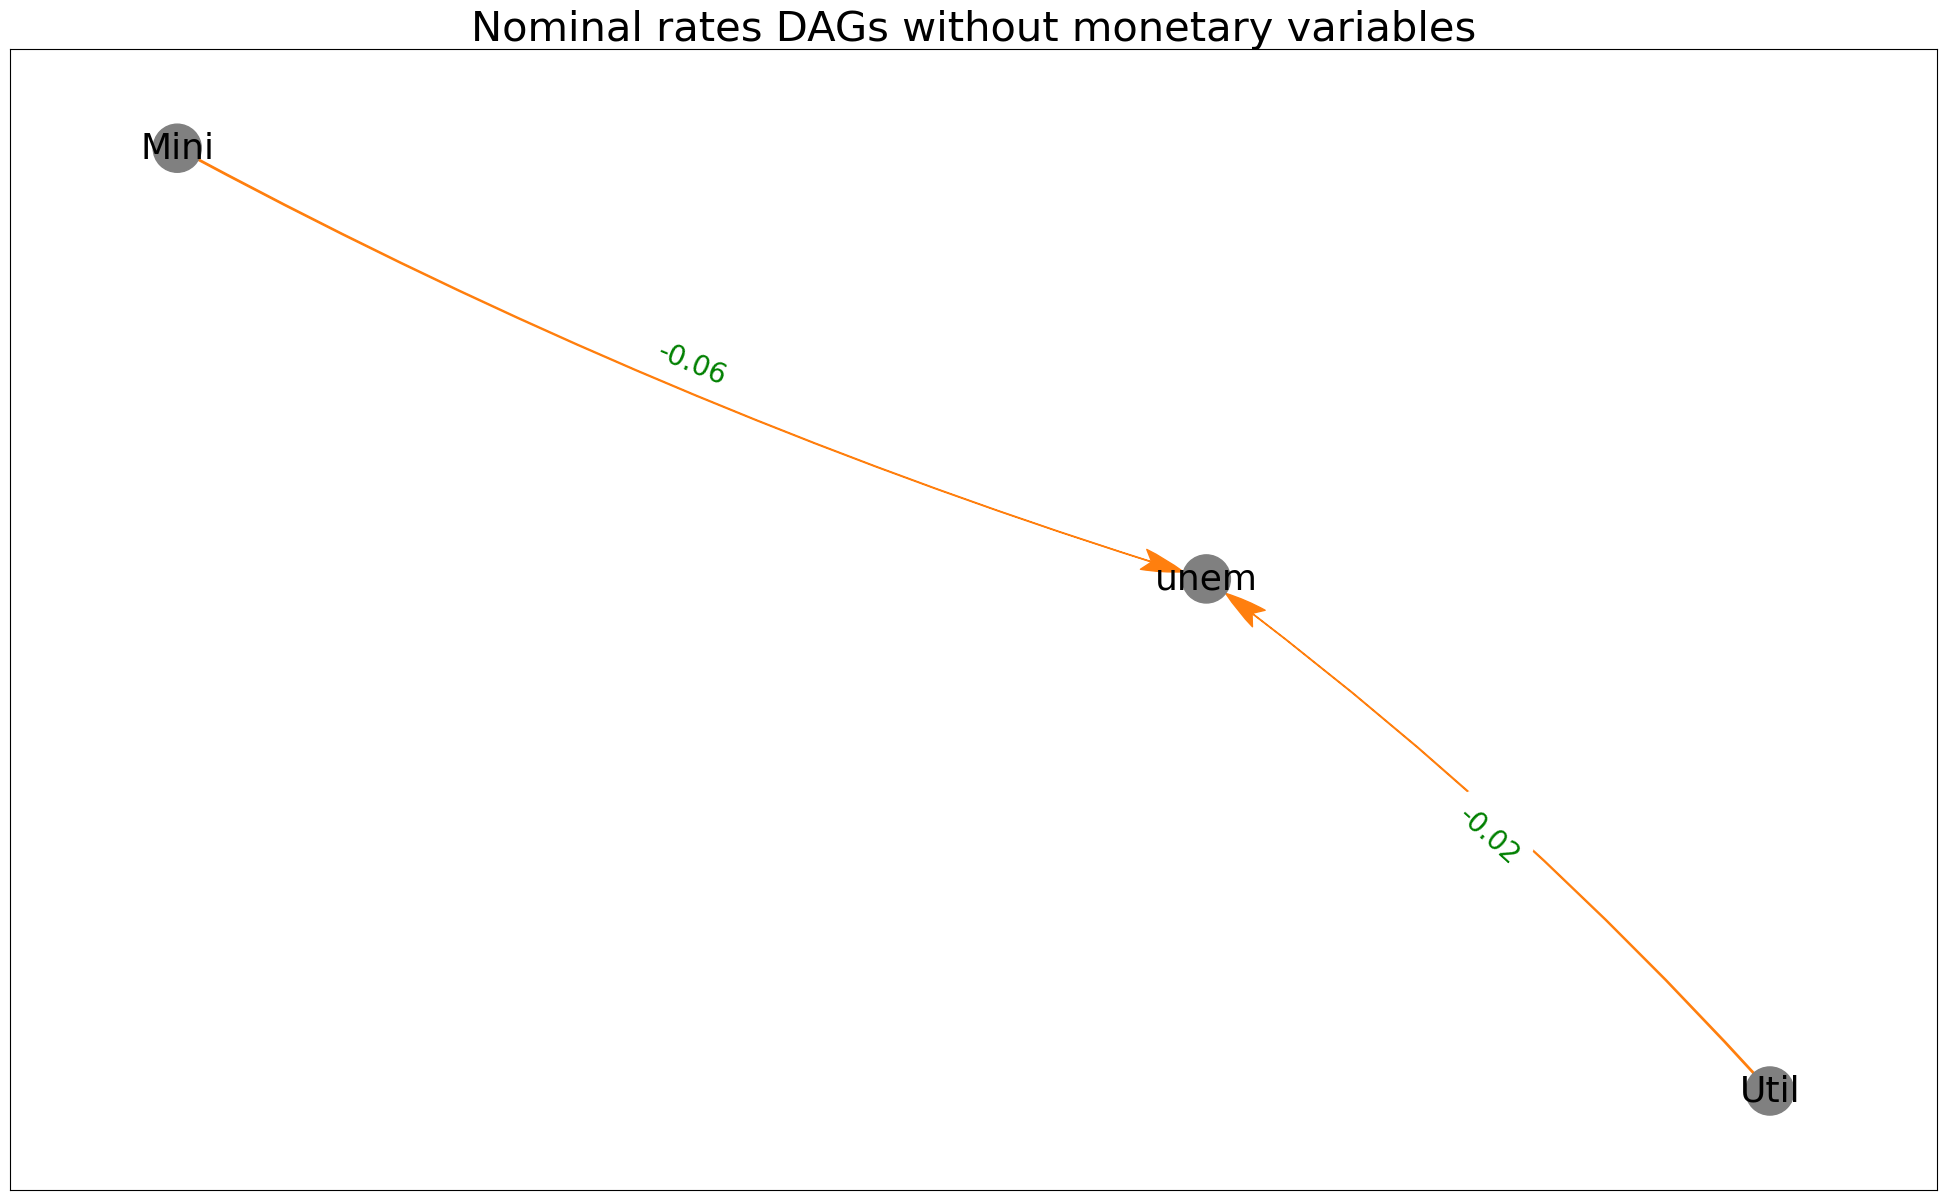

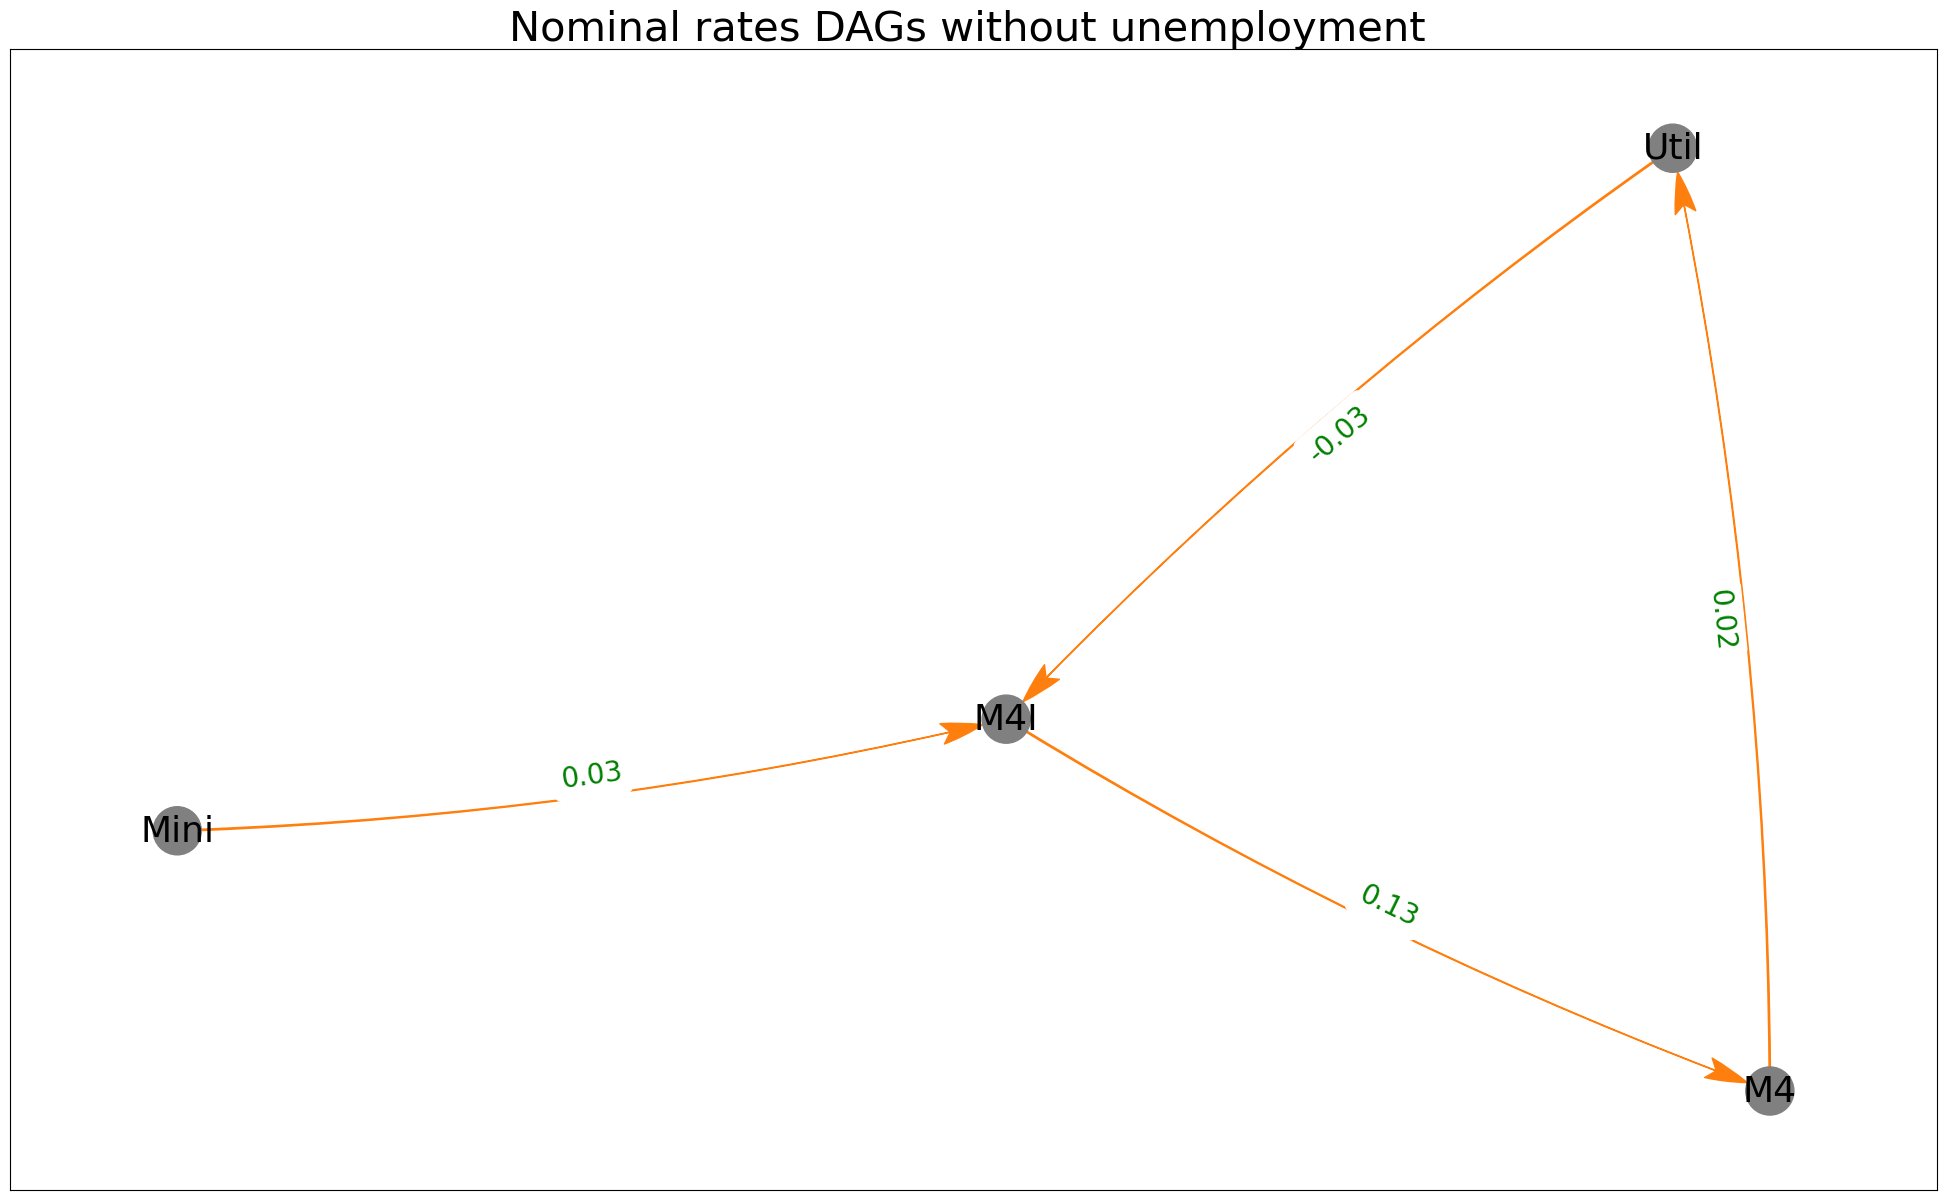

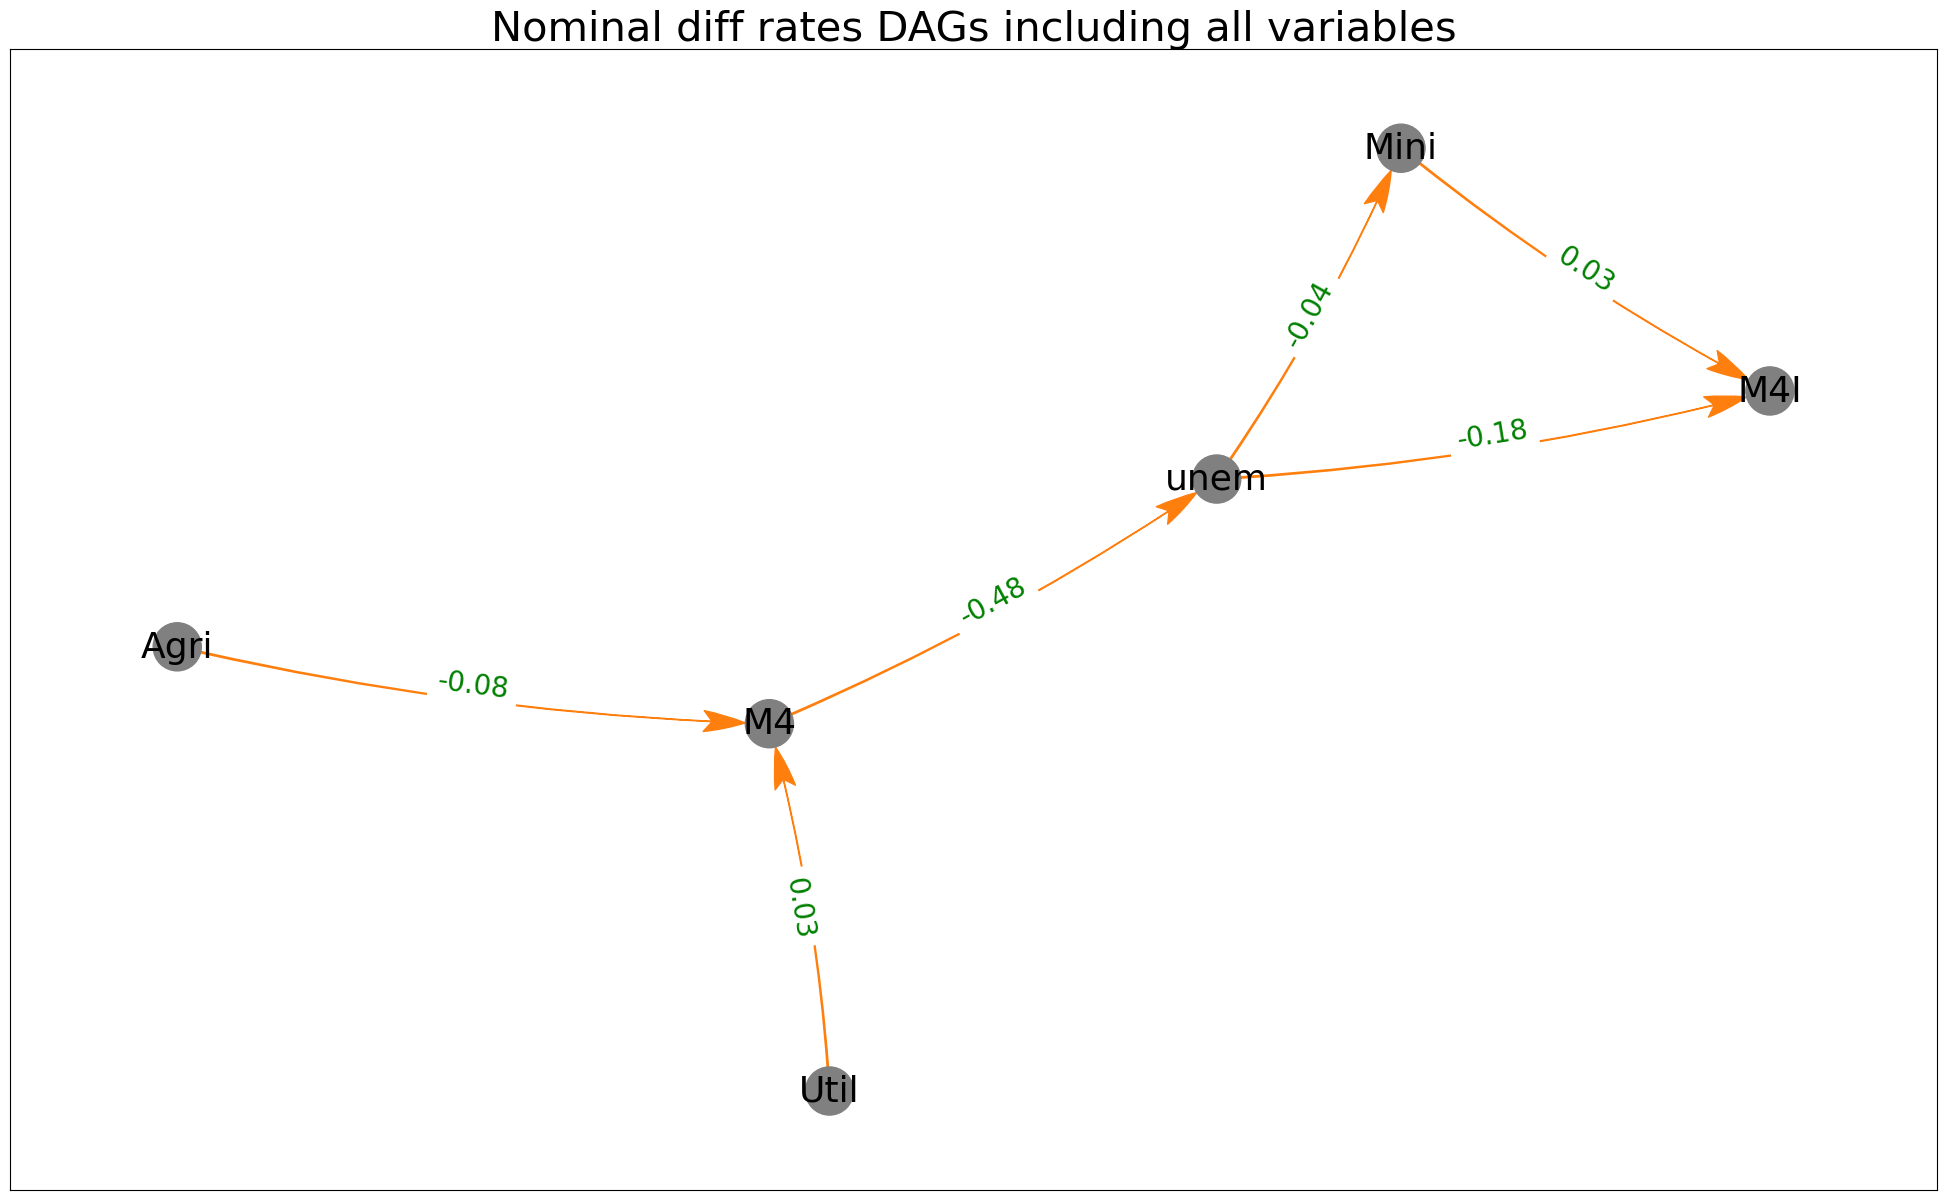

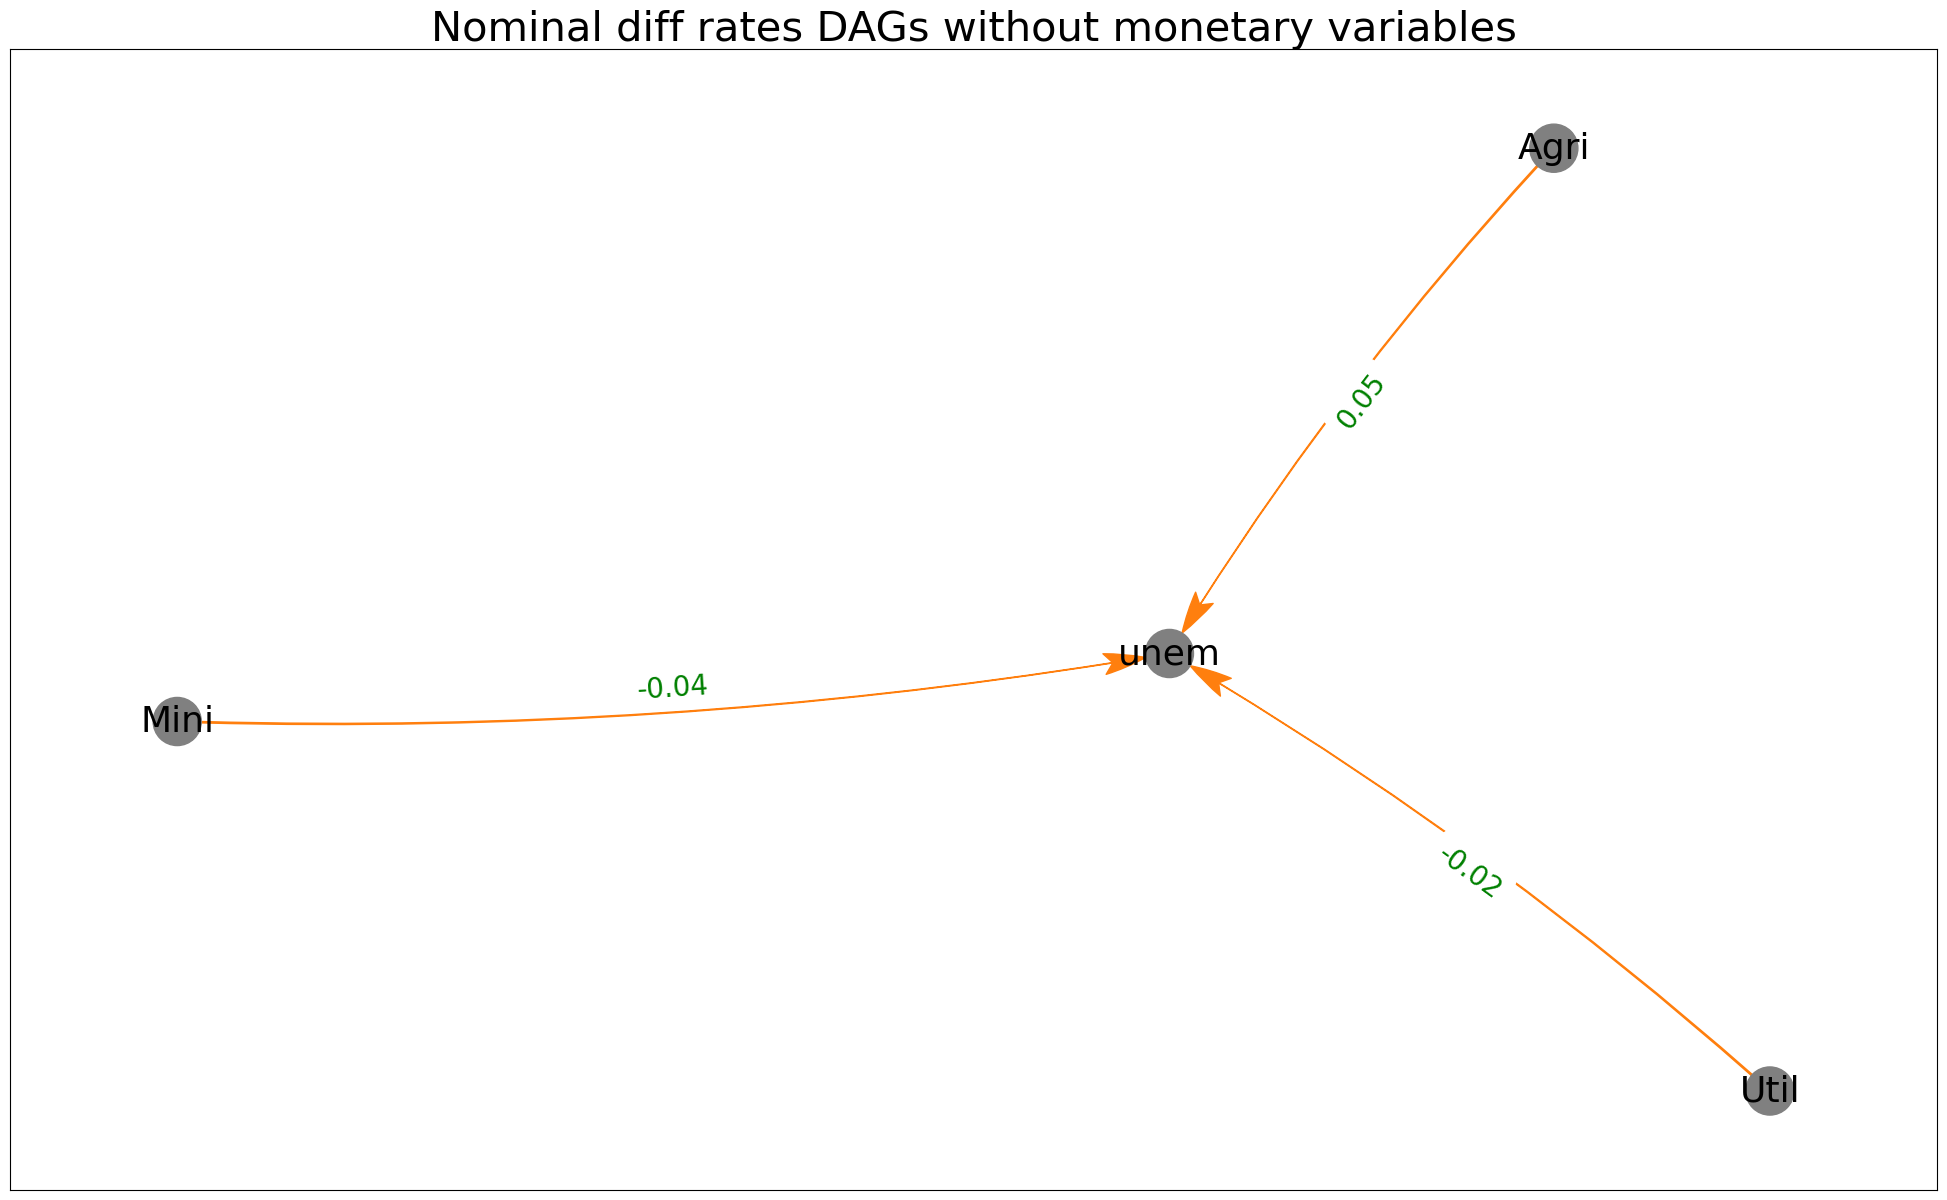

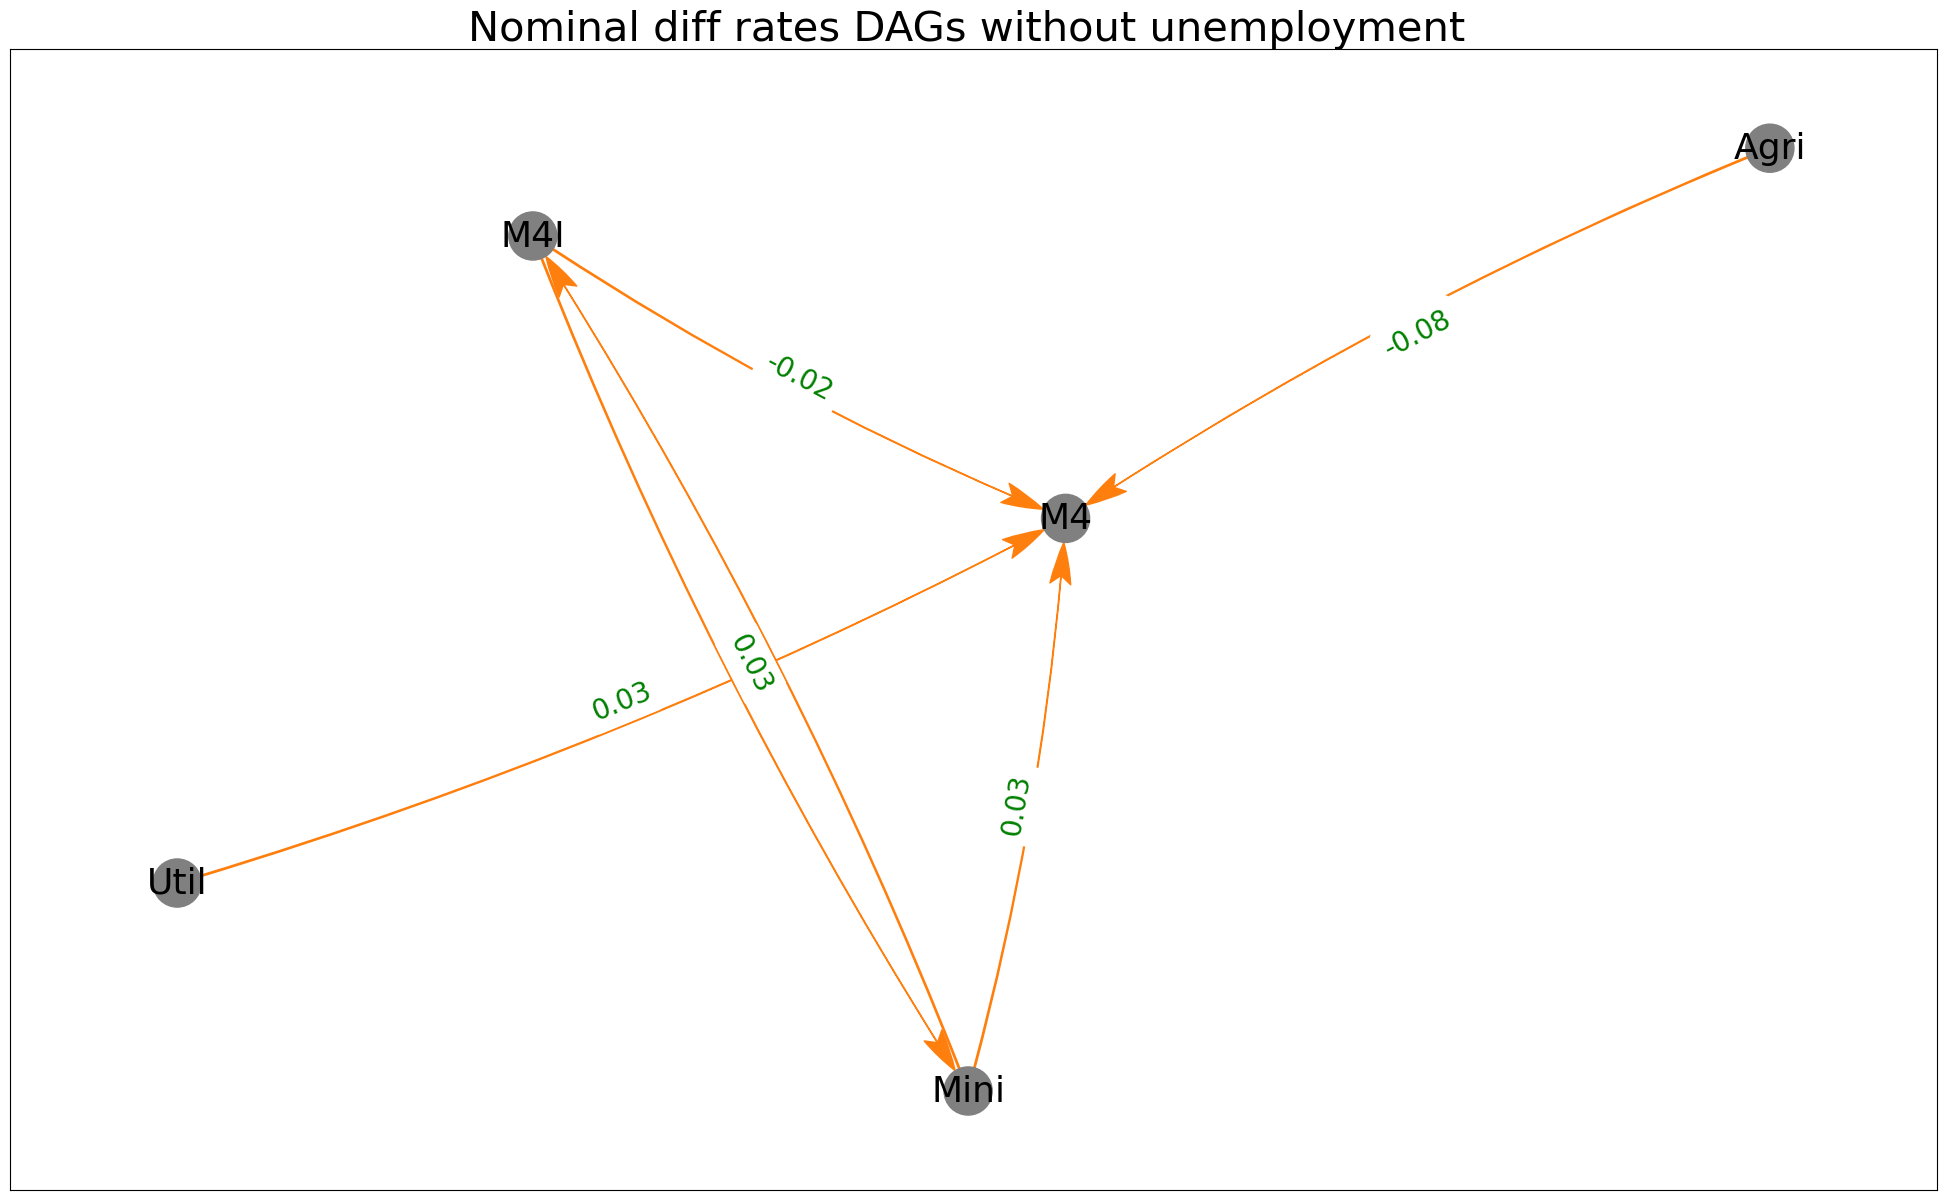

In [5]:
title = ['Nominal rates DAGs including all variables',
        'Nominal rates DAGs without monetary variables',
        'Nominal rates DAGs without unemployment ',
        'Nominal diff rates DAGs including all variables',
        'Nominal diff rates DAGs without monetary variables',
        'Nominal diff rates DAGs without unemployment ']

# Plot DAGs for each dataframe
for i, key in enumerate(['Nominal rates (All variables)',
                         'Nominal rates (without Monetary)',
                         'Nominal rates (without unem)',
                         'Nominal diff rates (All variables)',
                         'Nominal diff rates (without Monetary)',
                         'Nominal diff rates (without unem)']):
    plot_df = full_DAG_dict[key]
    c = PC(plot_df)
    max_cond_vars = len(plot_df.keys()) - 2
    model = c.estimate(return_type='pdag', variant='orig', significance_level=0.01,
                       max_cond_vars=max_cond_vars, ci_test='pearsonr')
    edges = model.edges

    # Plot the DAG
    graph_DAG(edges, plot_df, title=title[i])


Import dataframes for and fit the models (WLS and PooledOLS)

In [6]:
full_df_rates_cluster = pd.read_csv('full_df_rates_cluster.csv')

full_df_diff_cluster = pd.read_csv('full_df_diff_cluster.csv')

Here we use a function to fit the models and compare their results side by side.

In [7]:
data_cluster_dict = {
    'Nominal rates with clusters': pd.get_dummies(full_df_rates_cluster, columns=['clusters'], drop_first=True),
    'Nominal diff rates with clusters': pd.get_dummies(full_df_diff_cluster, columns=['clusters'], drop_first=True)
}

result_df = analyze_wls_pooled_models(data_cluster_dict, 
                                      dependent_var='unem', 
                                      k=5, shuffle=True, random_state=42, check_rank=False)

# Display the result DataFrame
print("\nResult DataFrame:")
display(result_df)



Result DataFrame:


,Nominal rates with clusters - True - WLS,Nominal rates with clusters - True - PooledOLS,Nominal rates with clusters - False - WLS,Nominal rates with clusters - False - PooledOLS,Nominal diff rates with clusters - True - WLS,Nominal diff rates with clusters - True - PooledOLS,Nominal diff rates with clusters - False - WLS,Nominal diff rates with clusters - False - PooledOLS
Agri,0.251217,0.126872,0.262021,0.235079,2.634831e-60,3.836349e-62,2.634831e-60,3.836349e-62
Mini,-0.319574,-0.534051,-0.199918,-0.669133,0.000000e+00,-2.523869e-63,0.000000e+00,-2.523869e-63
Util,0.271363,0.242186,0.642970,0.457337,-1.615679e-62,2.472647e-64,-1.615679e-62,2.472647e-64
M4,28.986150,22.781171,39.485842,42.847021,2.316346e-62,1.065234e-63,2.316346e-62,1.065234e-63
M4I,103.890490,78.328123,120.490433,136.094694,-7.001200e-65,2.999353e-65,-7.001200e-65,2.999353e-65
clusters_2.0,2.094951,3.477519,NaN,NaN,-1.842970e-61,-1.842970e-61,NaN,NaN
clusters_3.0,0.864351,1.903571,NaN,NaN,-1.127442e-88,-5.069125e-88,NaN,NaN
clusters_4.0,5.837338,7.952541,NaN,NaN,-2.306787e-89,-4.451563e-89,NaN,NaN
weight,-0.000087,-0.000064,-0.000059,-0.000053,-4.672484e-31,-4.672484e-31,-4.672484e-31,-4.672484e-31
$R^2$,0.823049,0.561374,0.787996,0.384859,5.222808e-01,6.675427e-05,5.222808e-01,6.675427e-05
